# EDA  On 200000 Jeopardy Questions 

*The Dataset is taken form Kaggle which contains the information of 2 lakh  Jeopardy questions of Diff value asked on diff shows and different dates*
<hr/>
<b>The dataset contains the following features</b>
<ol>
    <li>Show Number-The published show Number</li>
    <li>Air Date	-The Date of the show</li>
    <li>Round-Jeopardy or Double jeopardy or Final</li>
    <li>Category-Category of the question asked</li>
    <li>Value-Value of the question (200$,400$,800$.......$) </li>
    <li>Question-asked question during the round</li>
    <li>Answer-Answer given by the contestant </li>
    
 </ol>
    


In [1]:
#Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the Dataset
df=pd.read_csv('JEOPARDY_CSV.csv')

In [3]:
#Showing fhe First five columns of the dataset
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
#Getting the shape of the dataset
df.shape

(216930, 7)

<p>This dataset contains 216930 questions</p>

In [5]:
#getting Dtatypes of the Features
df.dtypes

Show Number     int64
 Air Date      object
 Round         object
 Category      object
 Value         object
 Question      object
 Answer        object
dtype: object

In [6]:
#getting Null value Rows
df.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

In [7]:
#Getting Column Names
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [8]:
#Renaming columns For Convinient use
df.rename(columns={'Show Number':'show_no',
                   ' Air Date':'air_date',' Round':'round',
                   ' Category':'category',' Value':'value',
                   'Question':'question',' Answer':'answer'},inplace=True)

In [9]:
#filling Null values of answer with no string .Since We can't guess the Answer
df['answer'].fillna(' ',inplace=True)

In [10]:
#Filling none string with '$0' string since No money is given to that question
value=df['value'].values
for  i in range(len(value)):
    if(value[i]=='None'):
        value[i]='$0'

In [11]:
#converting the data type of the value column to Int type
value=[i.replace(",","") for i in value]
value=[i.replace("$","") for i in value]
value=[int(i) for i in value]
df['value']=value

In [12]:
#coverting String Date To date Type column
df['air_date'] = pd.to_datetime(df['air_date'])

In [13]:
#Getting Unique Values Count of the Columns
columns=df.columns
for col in columns[0:7]:
    print(df[col].value_counts())
    print("======================================================")

2941    62
5332    62
6237    61
1945    61
3562    61
        ..
3656    30
6300    30
2757    30
3022    16
1178    12
Name: show_no, Length: 3640, dtype: int64
1997-05-19    62
2007-11-13    62
2011-11-01    61
1993-02-05    61
2000-02-15    61
              ..
2000-06-26    30
2012-01-27    30
1996-09-03    30
1997-10-21    16
1989-10-18    12
Name: air_date, Length: 3640, dtype: int64
Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name: round, dtype: int64
BEFORE & AFTER        547
SCIENCE               519
LITERATURE            496
AMERICAN HISTORY      418
POTPOURRI             401
                     ... 
1999 TELEVISION         1
WORDS IN PHYSICS        1
LITERATURE & MUSIC      1
'90s NOTABLES           1
CELEBRITY NAMES         1
Name: category, Length: 27995, dtype: int64
400      42244
800      31860
200      30455
1000     21640
600      20377
         ...  
5401         1
1183         1
1203         1
11600   

<b>Inference</b>
<ol>
<li>3640 Shows was telecasted  in 3640 diff dates.</li>
<li>four rounds are there in the quiz namely Jeopardy!,Double Jeopardy!,Final Jeopardy!,Tiebreaker.</li>
    <li>most repeatred categeory was Before and After</li>
<li>Max Amount  per Question is 11,200 dollars 
    and Min was 200 dollar</li>
    <li>There was no Reapeating Question But Some was Repeating Answers</li>
</ol>
 

# Univariate Analysis

##### Count Plot for round column

Text(0.5, 1.0, 'Number of Questions per round')

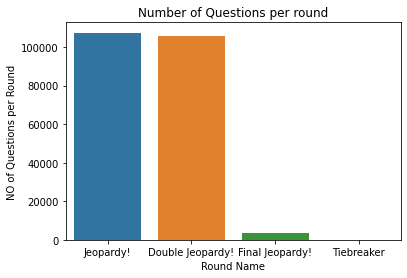

In [14]:
# Number of question asked per round
sns.countplot(x="round",data=df)
plt.xlabel("Round Name")
plt.ylabel("NO of Questions per Round")
plt.title("Number of Questions per round")

<b>Inference</b>
<ul>
    <li>More questions was asked in Jeopardy!(49%) Round followed by Double Jeopardy!(48%) and final Jeopardy!(2%)</li>
    <li>there is a 1% chance of tiebraker</li>
    </ul>

#### Barplot for Value Column

Text(0.5, 1.0, 'Top 10 Valued Qeustions')

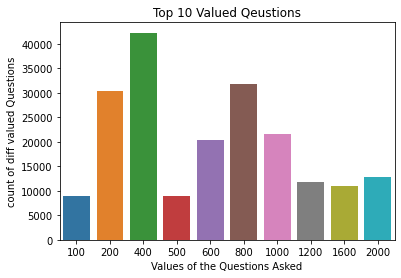

In [15]:
#barplot for the Value column(top 10 Values)
sns.barplot(x=df.value.value_counts()[:10].index,y=df.value.value_counts()[:10].values)
plt.xlabel('Values of the Questions Asked')
plt.ylabel('count of diff valued Questions')
plt.title('Top 10 Valued Qeustions')

**Inference**
* Mostly asked questions was Valued 400$(19%).

### Top Category Questions Asked in the Dataset

Text(0.5, 1.0, 'Top 10 category Qeustions')

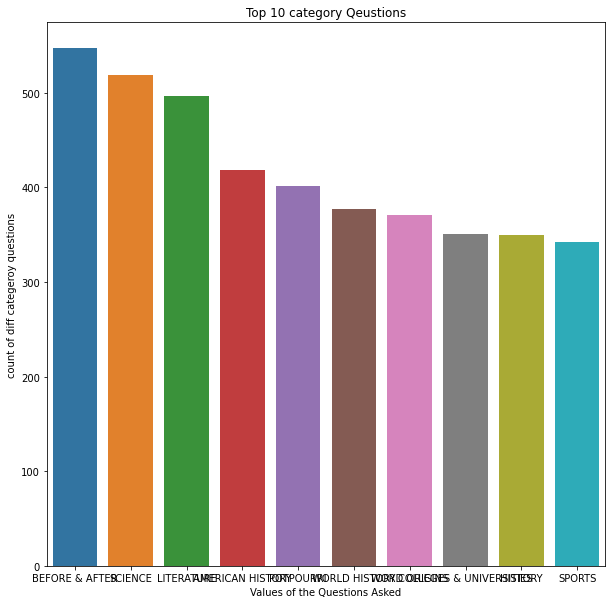

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df.category.value_counts()[:10].index,y=df.category.value_counts()[:10].values)
#plt.figure(figsize=(10, 100))
plt.xlabel('Values of the Questions Asked')
plt.ylabel('count of diff categeroy questions')
plt.title('Top 10 category Qeustions')


**Inference**
* Most Asked Categeory was Before And After



# Bivariate Analysis

In [17]:
#Getting Year wise Analysis
df['year'] = pd. DatetimeIndex(df['air_date']). year

In [18]:
df1=df.groupby('year')

# Scatter Plot for  Value(sum) and year

Text(0.5, 1.0, ' Sum Of Values Vs  year')

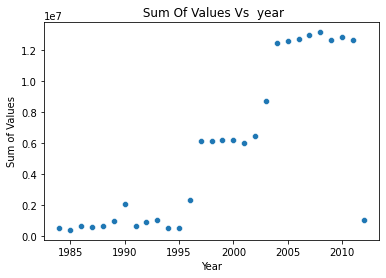

In [19]:
#Scatter plot for Value sum Vs year
sns.scatterplot(x=df1['value'].sum().index,y=df1['value'].sum().values)
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title(' Sum Of Values Vs  year')

**Inference**
* Increasing trend in the Sum of the values as the year progresses

# Pre Processing

In [20]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import contractions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
#Removing digits and fixing contracitons
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    contractions.fix(text)
    text = re.sub(pattern, '', text)
    return text

In [22]:
#Stop words removal Function
stop_words = nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    text = ' '.join(filtered_tokens)    
    return text

In [23]:
#Removing Html Tags
import re
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

In [24]:
#lemmatization with pos tagging
from nltk.corpus import wordnet
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def lematization(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN))
                            for word, tag in tagged_tokens]
    lemmatized_text = ' '.join(wnl.lemmatize(word, tag) for word, tag in new_tagged_tokens)
    return  lemmatized_text


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gorla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
#Html tag removing ,Fixing contracitins and Removing special Charecters And digits
que=df[' Question'].tolist()
print(que[466])
for i in range(len(que)):
    text=strip_html_tags(que[i])
    que[i]=text
for i in range(len(que)):
    text=remove_special_characters(que[i],remove_digits=True)
    que[i]=text
for i in range(len(que)):
    text=remove_stopwords(que[i],is_lower_case=False)
    que[i]=text
for i in range(len(que)):
    text=lematization(que[i])
    que[i]=text

C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


(<a href="http://www.j-archive.com/media/2010-12-07_DJ_09.jpg" target="_blank">Dr. Oz presents the clue.</a>) By surgically interrupting the electrical impulses that are causing an abnormal rhythm, the maze procedure is designed to threat this type of heart arrhythmia abbreviated "A.F."


In [26]:
que[466]

'Dr Oz present clue surgically interrupt electrical impulse cause abnormal rhythm maze procedure design threat type heart arrhythmia abbreviate AF'

In [27]:
df["questions"]=que

In [28]:
df.drop([' Question'],axis=1,inplace=True)

In [29]:
df

,show_no,air_date,round,category,value,answer,year,questions
0,4680,2004-12-31,Jeopardy!,HISTORY,200,Copernicus,2004,last year life Galileo house arrest espouse ma...
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,Jim Thorpe,2004,Olympian football star Carlisle Indian School ...
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,Arizona,2004,city Yuma state record average hour sunshine year
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,McDonald's,2004,live Art Linkletter Show company serve billion...
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,John Adams,2004,Signer Dec Indep framer Constitution Mass seco...
...,...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,2000,Turandot,2006,Puccini opera turn solution riddle pose heroine
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",2000,a titmouse,2006,North America term properly apply specie crest...
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,2000,Clive Barker,2006,Penny Lane Hellraiser grow barber shave anothe...
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,2000,Geronimo,2006,Ft Sill Okla make plea Arizona land home fathe...


In [30]:
que_list=df['questions'].tolist()

In [31]:
df2=df['questions']

In [32]:
df['category'].value_counts().values[:50]

array([547, 519, 496, 418, 401, 377, 371, 351, 349, 342, 339, 338, 327,
       324, 314, 311, 301, 300, 299, 297, 294, 294, 284, 282, 281, 280,
       279, 279, 279, 270, 270, 267, 258, 255, 250, 246, 245, 244, 244,
       243, 242, 242, 240, 236, 234, 233, 232, 232, 230, 226], dtype=int64)

In [33]:
df['category'].value_counts().index[:50]

Index(['BEFORE & AFTER', 'SCIENCE', 'LITERATURE', 'AMERICAN HISTORY',
       'POTPOURRI', 'WORLD HISTORY', 'WORD ORIGINS', 'COLLEGES & UNIVERSITIES',
       'HISTORY', 'SPORTS', 'U.S. CITIES', 'WORLD GEOGRAPHY',
       'BODIES OF WATER', 'ANIMALS', 'STATE CAPITALS', 'BUSINESS & INDUSTRY',
       'ISLANDS', 'WORLD CAPITALS', 'U.S. GEOGRAPHY', 'RELIGION', 'OPERA',
       'SHAKESPEARE', 'LANGUAGES', 'BALLET', 'TELEVISION',
       'FICTIONAL CHARACTERS', 'PEOPLE', 'RHYME TIME', 'TRANSPORTATION',
       'ART & ARTISTS', 'STUPID ANSWERS', 'THE BIBLE', 'ART',
       'BOOKS & AUTHORS', 'U.S. HISTORY', 'FOOD', 'MUSEUMS', 'AMERICANA',
       'SCIENCE & NATURE', 'COMMON BONDS', 'GEOGRAPHY',
       'HOLIDAYS & OBSERVANCES', '3-LETTER WORDS', 'ANNUAL EVENTS',
       'AMERICAN LITERATURE', 'CLASSICAL MUSIC', 'POP MUSIC', 'AUTHORS',
       'POETS & POETRY', 'QUOTATIONS'],
      dtype='object')

In [34]:
#Initializing tfidfvect0rizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [35]:
#Merging the top categeories
Before_and_after=['BEFORE & AFTER']
History=['AMERICAN HISTORY','WORLD HISTORY','HISTORY',"U.S. HISTORY"]
Geography=['WORLD GEOGRAPHY','U.S. GEOGRAPHY','GEOGRAPHY']
Literature=['FICTIONAL CHARACTERS','LITERATURE','SHAKESPEARE','BOOKS & AUTHORS','AMERICAN LITERATURE','AUTHORS','POETS & POETRY', 'QUOTATIONS','LANGUAGES']
Science=['SCIENCE','SCIENCE & NATURE','FOOD']
Music=['CLASSICAL MUSIC', 'POP MUSIC']
Cities=['U.S. CITIES','STATE CAPITALS','WORLD CAPITALS']
Religion=['RELIGION','THE BIBLE']
Water_bodies=['BODIES OF WATER','ISLANDS']
Art=['ART & ARTISTS','ART']



In [36]:
#Filtering Top Categories
Selected_categories=['BEFORE & AFTER','AMERICAN HISTORY','WORLD HISTORY','HISTORY',"U.S. HISTORY",'WORLD GEOGRAPHY','U.S. GEOGRAPHY','GEOGRAPHY','FICTIONAL CHARACTERS','LITERATURE','SHAKESPEARE','BOOKS & AUTHORS','AMERICAN LITERATURE','AUTHORS','POETS & POETRY', 'QUOTATIONS','LANGUAGES','SCIENCE','SCIENCE & NATURE','FOOD','CLASSICAL MUSIC', 'POP MUSIC','U.S. CITIES','STATE CAPITALS','WORLD CAPITALS','RELIGION','THE BIBLE','BODIES OF WATER','ISLANDS','ART & ARTISTS','ART']

In [37]:
df1= df[df.category.isin(['BEFORE & AFTER','AMERICAN HISTORY','WORLD HISTORY','HISTORY',"U.S. HISTORY",'WORLD GEOGRAPHY','U.S. GEOGRAPHY','GEOGRAPHY','FICTIONAL CHARACTERS','LITERATURE','SHAKESPEARE','BOOKS & AUTHORS','AMERICAN LITERATURE','AUTHORS','POETS & POETRY', 'QUOTATIONS','LANGUAGES','SCIENCE','SCIENCE & NATURE','FOOD','CLASSICAL MUSIC', 'POP MUSIC','U.S. CITIES','STATE CAPITALS','WORLD CAPITALS','RELIGION','THE BIBLE','BODIES OF WATER','ISLANDS','ART & ARTISTS','ART'])]

In [38]:
cat_list=df1.category.values
len(cat_list)

9498

In [39]:
#Encoding the Category
en_cat=[]
for i in range(len(cat_list)):
    if(cat_list[i] in Before_and_after):
        en_cat.append(0)
    if(cat_list[i] in History):
        en_cat.append(1)
    if(cat_list[i] in Geography):
        en_cat.append(2)
    if(cat_list[i] in Literature):
        en_cat.append(3)
    if(cat_list[i] in Science):
        en_cat.append(4)
    if(cat_list[i] in Music):
        en_cat.append(5)
    if(cat_list[i] in Cities):
        en_cat.append(6)
    if(cat_list[i] in Religion):
        en_cat.append(7)
    if(cat_list[i] in Water_bodies):
        en_cat.append(8)
    if(cat_list[i] in Art):
        en_cat.append(9)

In [40]:
x=np.reshape(en_cat,(1,len(en_cat)))
x

array([[1, 1, 1, ..., 3, 6, 3]])

In [41]:
df1.loc[:,["Category"]]=en_cat

C:\Users\gorla\AppData\Local\Temp\ipykernel_6108\1447742882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,["Category"]]=en_cat


In [42]:
df1.reset_index(inplace=True)

In [43]:
df1.drop(['index'],axis=1,inplace=True)

C:\Users\gorla\AppData\Local\Temp\ipykernel_6108\1829172417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['index'],axis=1,inplace=True)


In [44]:
#PreProcessing the Answer (Using to predict the Category of the Question)
Ans=df1['answer'].tolist()
for i in range(len(Ans)):
    text=strip_html_tags(Ans[i])
    Ans[i]=text
for i in range(len(Ans)):
    text=remove_special_characters(Ans[i],remove_digits=True)
    Ans[i]=text
for i in range(len(Ans)):
    text=remove_stopwords(Ans[i],is_lower_case=False)
    Ans[i]=text
for i in range(len(Ans)):
    text=lematization(Ans[i])
    Ans[i]=text

C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [45]:
df1['Answer']=Ans

C:\Users\gorla\AppData\Local\Temp\ipykernel_6108\2291781533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Answer']=Ans


In [46]:
df1.drop(['answer'],axis=1,inplace=True)

C:\Users\gorla\AppData\Local\Temp\ipykernel_6108\256867441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['answer'],axis=1,inplace=True)


In [47]:
df1

,show_no,air_date,round,category,value,year,questions,Category,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,2004,last year life Galileo house arrest espouse ma...,1,Copernicus
1,4680,2004-12-31,Jeopardy!,HISTORY,400,2004,Built BC link Rome South Italy still use today,1,Appian Way
2,4680,2004-12-31,Jeopardy!,HISTORY,600,2004,Rajaraja Cholas battle take Indian Ocean islan...,1,Ceylon Sri Lanka
3,4680,2004-12-31,Jeopardy!,HISTORY,800,2004,Karl lead first Marxist organizational effort ...,1,International
4,4680,2004-12-31,Jeopardy!,HISTORY,1000,2004,Asian political party found Indian National pa...,1,Congress Party
...,...,...,...,...,...,...,...,...,...
9493,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,2200,2006,Oscar Wilde call letter word curse drinking class,3,work
9494,4999,2006-05-11,Double Jeopardy!,WORLD CAPITALS,3400,2006,Guyanese capital name Hanoverian monarch,6,Georgetown
9495,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,1600,2006,motto politics want anything say ask man want ...,3,Margaret Thatcher
9496,4999,2006-05-11,Double Jeopardy!,WORLD CAPITALS,2000,2006,Suriname River,6,Paramaribo


In [48]:
#concatinating the  Question And Answer Column to Text
df1["Text"] = df1['questions'].astype(str) +" "+ df1["Answer"].astype(str)
df1

C:\Users\gorla\AppData\Local\Temp\ipykernel_6108\3562130185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Text"] = df1['questions'].astype(str) +" "+ df1["Answer"].astype(str)


,show_no,air_date,round,category,value,year,questions,Category,Answer,Text
0,4680,2004-12-31,Jeopardy!,HISTORY,200,2004,last year life Galileo house arrest espouse ma...,1,Copernicus,last year life Galileo house arrest espouse ma...
1,4680,2004-12-31,Jeopardy!,HISTORY,400,2004,Built BC link Rome South Italy still use today,1,Appian Way,Built BC link Rome South Italy still use today...
2,4680,2004-12-31,Jeopardy!,HISTORY,600,2004,Rajaraja Cholas battle take Indian Ocean islan...,1,Ceylon Sri Lanka,Rajaraja Cholas battle take Indian Ocean islan...
3,4680,2004-12-31,Jeopardy!,HISTORY,800,2004,Karl lead first Marxist organizational effort ...,1,International,Karl lead first Marxist organizational effort ...
4,4680,2004-12-31,Jeopardy!,HISTORY,1000,2004,Asian political party found Indian National pa...,1,Congress Party,Asian political party found Indian National pa...
...,...,...,...,...,...,...,...,...,...,...
9493,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,2200,2006,Oscar Wilde call letter word curse drinking class,3,work,Oscar Wilde call letter word curse drinking cl...
9494,4999,2006-05-11,Double Jeopardy!,WORLD CAPITALS,3400,2006,Guyanese capital name Hanoverian monarch,6,Georgetown,Guyanese capital name Hanoverian monarch Georg...
9495,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,1600,2006,motto politics want anything say ask man want ...,3,Margaret Thatcher,motto politics want anything say ask man want ...
9496,4999,2006-05-11,Double Jeopardy!,WORLD CAPITALS,2000,2006,Suriname River,6,Paramaribo,Suriname River Paramaribo


In [49]:
#Assigning the Target Column And dropping Unwanted Columns
y=df1['Category']
df1.drop(['Category','value','Answer','show_no','air_date','year','questions'],axis=1,inplace=True)

C:\Users\gorla\AppData\Local\Temp\ipykernel_6108\2175408854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Category','value','Answer','show_no','air_date','year','questions'],axis=1,inplace=True)


In [50]:
#One hot Encoding for round column
df2 = pd.get_dummies(df1, columns = ['round'])
#df2.drop([0,1,2,3,4,6,7,8],axis=1,inplace=True)


# Tf-idf Embeding Model

In [51]:
#Converting text to vectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
X=df2.iloc[:,1].values
count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(X)
doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names()
df3 = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
df3

C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aactress,aaliyah,aalphabetically,aardvark,aaron,aarons,ab,ababa,aback,...,zoroastrianism,zr,zubin,zucchini,zuckerman,zulu,zurbriggen,zwinglianism,zwyn,zygote
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc9493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc9494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc9495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc9496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Making TF-IDF Dataframe
from sklearn.preprocessing import MinMaxScaler
X=df2.iloc[:,1].values
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 17723)
X = td.fit_transform(X)
df4 = pd.DataFrame(data=X.toarray(), index=doc_names,columns=feat_names)
scaler = MinMaxScaler()
#Normalizing the data
df4= scaler.fit_transform(df4.iloc[:,:])


In [53]:
# df4['Round']=df1['round'].values
# df5 = pd.get_dummies(df4, columns = ['Round'])

In [54]:
#splitting  the data to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size = 0.3,
                                                    random_state = 0)

In [55]:
#Using MultinomialNB Classifier  for predicting  category
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [56]:
#model Metrics 
from sklearn.metrics import confusion_matrix, classification_report
classification_report = classification_report(y_test, y_pred)
cm=confusion_matrix(y_pred,y_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.72      0.27      0.39       166
           1       0.68      0.77      0.73       433
           2       0.54      0.61      0.57       254
           3       0.71      0.95      0.81       741
           4       0.87      0.81      0.84       293
           5       0.90      0.66      0.76       151
           6       0.72      0.78      0.75       295
           7       0.82      0.49      0.61       178
           8       0.71      0.37      0.49       193
           9       0.93      0.76      0.84       146

    accuracy                           0.73      2850
   macro avg       0.76      0.65      0.68      2850
weighted avg       0.74      0.73      0.71      2850



In [57]:
#Connfusion matrix for multinominalNB Classifier
cm

array([[ 44,   0,   0,   2,   2,  11,   0,   2,   0,   0],
       [ 27, 335,  21,  22,  10,   5,  30,  20,  14,   6],
       [  3,   7, 154,   5,  10,   1,  16,   2,  87,   0],
       [ 66,  62,   8, 702,  20,  26,  17,  57,  10,  20],
       [ 10,   2,   3,   2, 236,   3,   0,   6,   1,   7],
       [  6,   0,   0,   0,   3,  99,   2,   0,   0,   0],
       [  4,  21,  41,   4,   5,   3, 230,   4,   7,   0],
       [  1,   4,   1,   4,   4,   1,   0,  87,   2,   2],
       [  0,   2,  26,   0,   2,   0,   0,   0,  72,   0],
       [  5,   0,   0,   0,   1,   2,   0,   0,   0, 111]], dtype=int64)

**The accuracy of the model MultinomialNB=73%**

In [58]:
#Using Random Forest Classifier  for predicting  category
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
#Metrics for Random Forest Classifier
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.21      0.76      0.33        46
           1       0.65      0.70      0.68       399
           2       0.48      0.63      0.54       193
           3       0.90      0.71      0.79       942
           4       0.81      0.62      0.70       384
           5       0.53      0.74      0.62       108
           6       0.88      0.70      0.78       373
           7       0.42      0.76      0.54        99
           8       0.67      0.67      0.67       192
           9       0.71      0.91      0.80       114

    accuracy                           0.70      2850
   macro avg       0.63      0.72      0.64      2850
weighted avg       0.76      0.70      0.71      2850



In [62]:
#Confusion Matrix for Random Forest Classifioer
print(confusion_matrix(y_pred,y_test))

[[ 35   0   0   2   2   4   0   3   0   0]
 [ 25 281  19  24  10   6  12  14   4   4]
 [  2  11 121   3   5   2   5   5  38   1]
 [ 60  64   7 665  33  39   6  42   4  22]
 [ 20  26  10  23 237  13   6  30   8  11]
 [ 14   6   0   1   2  80   3   1   1   0]
 [  6  26  52  11   1   4 260   4   7   2]
 [  1  11   1   7   0   0   0  75   2   2]
 [  1   7  43   4   2   0   3   3 129   0]
 [  2   1   1   1   1   3   0   1   0 104]]


**The accuracy of the model RandomForestClassifier =69%**

# Word2vec  Embeding

In [63]:
#Importing Requiired Libraries
from nltk.corpus import stopwords 
from nltk import word_tokenize,sent_tokenize 
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [64]:
#Breaking Text into Tokens
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences=[]
sum=0
for text in df1['Text']:
  sents=tokenizer.tokenize(text.strip())
  sum+=len(sents)
  for sent in sents:
    cleaned_sent=sent
    sentences.append(cleaned_sent.split()) 
print(len(sentences))

9498


In [65]:
#Bulding word2wvc model from sentences with vector size 200
model = Word2Vec(sentences=sentences, vector_size=200,workers=-1)

In [68]:
# X=avg_w2vec(df1['Text'])
vocab=list(model.wv.key_to_index.keys())
X=avg_w2vec(df1['Text'])

Next sequence pentagon hexagon heptagon octogon
Butch Cassidys sidekicks extreme tact delicacy Sundance Kid glove


In [69]:
#getting average of the sentence vector from the model voacb vectors of size 200
def avg_w2vec(sentences):
    transformed=[]
    for sentence in (sentences):
        count=0
        vector=np.zeros(200)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

In [70]:
# X=df1['Text']
X=avg_w2vec(df1['Text'])
vocab=list(model.wv.key_to_index.keys())

Next sequence pentagon hexagon heptagon octogon
Butch Cassidys sidekicks extreme tact delicacy Sundance Kid glove


In [71]:
#Getting lengthes for text and target
print(len(X))
print(len(y))

9496
9498


In [72]:
df1[df1['Text']=='Next sequence pentagon hexagon heptagon octogon']

,round,category,Text
1505,Double Jeopardy!,SCIENCE,Next sequence pentagon hexagon heptagon octogon


In [73]:
df1[df1['Text']=='Butch Cassidys sidekicks extreme tact delicacy Sundance Kid glove']

,round,category,Text
1967,Double Jeopardy!,BEFORE & AFTER,Butch Cassidys sidekicks extreme tact delicacy...


In [74]:
1505,1967

(1505, 1967)

In [75]:
#deleting the Vectors that are not produced by word2vec model
y=np.delete(y.values,1505)
y=np.delete(y,1967)

In [76]:
len(y)

9496

In [77]:
len(X)

9496

In [78]:
#Splitting the train and test dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [79]:
#Random Forest  classifier for classification
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
y_pred = classifier.predict(x_test)

In [81]:
#Classification Report for Randomforset Classifier
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.26      0.32      0.29       363
           2       0.08      0.38      0.13        61
           3       0.94      0.35      0.51      2293
           4       0.11      0.44      0.18        86
           5       0.01      1.00      0.02         2
           6       0.59      0.65      0.62       275
           7       0.01      1.00      0.02         2
           8       0.14      0.62      0.23        47
           9       0.03      1.00      0.06         5

    accuracy                           0.38      3134
   macro avg       0.22      0.58      0.21      3134
weighted avg       0.77      0.38      0.47      3134



C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
#After Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [83]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.33)

In [84]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
y_pred = classifier.predict(x_test)

In [86]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      0.29      0.27       391
           2       0.09      0.46      0.15        61
           3       0.95      0.35      0.51      2299
           4       0.16      0.57      0.26        89
           5       0.01      1.00      0.01         1
           6       0.54      0.66      0.59       241
           7       0.01      1.00      0.01         1
           8       0.14      0.64      0.23        44
           9       0.03      1.00      0.06         6

    accuracy                           0.38      3134
   macro avg       0.22      0.60      0.21      3134
weighted avg       0.77      0.38      0.47      3134



In [87]:
print(confusion_matrix(y_pred,y_test))

[[  0   0   0   0   0   1   0   0   0   0]
 [ 16 113  56  35  27  17  35  38  27  27]
 [  2   1  28   1   3   0   8   3  15   0]
 [154 317 180 801 220 138  91 133 120 145]
 [  6   3   2   5  51   7   2   6   1   6]
 [  0   0   0   0   0   1   0   0   0   0]
 [  4  16  34   4   9   3 159   6   5   1]
 [  0   0   0   0   0   0   0   1   0   0]
 [  1   1  11   1   0   0   1   0  28   1]
 [  0   0   0   0   0   0   0   0   0   6]]


**The accuracy of the RandomForestClassifier=36%**

In [88]:
#Multinomialnb classifier
classifier = MultinomialNB( alpha=1.0, fit_prior=True, class_prior=None)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      1.00      0.01         1
           3       1.00      0.27      0.43      3124
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.02      0.56      0.03         9
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.27      3134
   macro avg       0.10      0.18      0.05      3134
weighted avg       1.00      0.27      0.43      3134



C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gorla\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
print(confusion_matrix(y_pred,y_test))

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0]
 [183 450 308 847 310 167 291 187 195 186]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   1   2   0   0   0   5   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


# Results

* Tf-idf word embeding gives the avg accuracy of 71%
* Word2vec gives the avg Accuracy of 33%
*As including the The other columns[Round,value] As features the accuuracy degrades 
